In [1]:
import ipywidgets as widgets

In [2]:
import json
import os
import pandas as pd

In [3]:
import numpy as np
from matplotlib import pyplot as plt


In [126]:
def plot_image(corr,desc):
    im = plt.imread('../figures/nhl_rink.png')
    fig, ax = plt.subplots()
    # y=0.8
    plt.title(desc+"\n")
    plt.title("home",loc='left')
    plt.title("away",loc='right')
    ax.imshow(im, extent=[-100,100,-42.5,42.5])
    # plotting the point
    ax.plot(corr['x'],corr['y'], marker='o',markersize=10, markeredgecolor="red", markerfacecolor="blue")

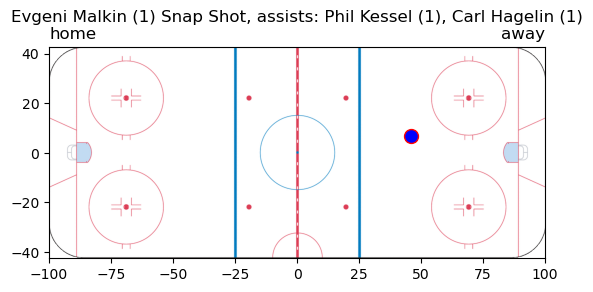

In [127]:
plot_image(data['coordinates'],data['result']['description'])

 ## Run the code from below

In [ ]:
stype = ['regular_season','playoffs']
all_data = {}
for i in stype:
    f = open('/Users/vaibhavjade/classwork/data science/hockey-primer-1/data/2017/2017_'+i+'.json')
    season = json.load(f)
    all_data[i] = season

In [81]:
# Visualizing the 2017 regular and playoff data

@widgets.interact(
    gtype=widgets.Dropdown(options=['regular_season','playoffs'],value='regular_season',description="Game Type:"
))
def season_vis(gtype):
    season = all_data[gtype]
    ids = list(season.keys())

    @widgets.interact(
        idx=widgets.IntSlider(min=0, max=len(ids)-1, step=1, value=len(ids)//2,description="Game ID:")
    )
    def game_vis(idx):

        game = season[ids[idx]]
        event_arr = game['liveData']['plays']['allPlays']
        periods = game['liveData']['linescore']['periods']
        home_team = game['liveData']['linescore']['teams']['home']
        add = game['liveData']['linescore']['shootoutInfo']
        h = {i:j for i,j in home_team.items() if i in ['team','goals','shotsOnGoal']}
        away_team = game['liveData']['linescore']['teams']['away']
        a = {i:j for i,j in away_team.items() if i in ['team','goals','shotsOnGoal']}
        h['team'] = h['team']['abbreviation']
        a['team'] = a['team']['abbreviation']
        h.update(add['home'])
        a.update(add['away'])
        
        # game metadata
        print("NHL Game ID:"+str(game['gameData']['game']['pk'])+
                                 " ; "+str(h['team'])+"(Home) vs "+str(a['team'])+"(Away)")
        print("Start date-time:"+str(game['gameData']['datetime']['dateTime']+'\n'))
        
        summary = pd.DataFrame({'home':h,'away':a})
        summary.rename(index= {'scores':'SO scores','attempts':"SO attempts"},inplace=True)
        print(summary)
        
        @widgets.interact(
            x=widgets.IntSlider(
                min=0, max=len(event_arr)-1, step=1, value=len(event_arr)//2,description="Event ID:")
        )
        def event_vis(x):
            event = event_arr[x]
            period = event['about']['period']

            def plot_image(corr,desc):
                im = plt.imread('../figures/nhl_rink.png')
                fig, ax = plt.subplots()

                fig.suptitle(desc,y=0.85)#(desc+"\n")
                plt.title("Period:"+str(period)+'  '+"Time:"+str(event['about']["periodTime"])+'\n')
                #putting team names on the goalpost sides
                loc = lambda x: periods[period - 1][x].get('rinkSide')
                plt.title(home_team['team']['abbreviation'],loc=loc('home'))
                plt.title(away_team['team']['abbreviation'],loc=loc('away'))
                ax.imshow(im, extent=[-100,100,-42.5,42.5])
                plt.xlabel('feet')
                plt.ylabel('feet')
                # plotting the point
                ax.plot(corr['x'],corr['y'], marker='o',markersize=10, markeredgecolor="red", markerfacecolor="yellow")

            if event.get('coordinates') != {}:
                plot_image(event.get('coordinates'),event['result']['description'])
                plt.show()
            print(json.dumps(event,indent=4))

interactive(children=(Dropdown(description='Game Type:', options=('regular_season', 'playoffs'), value='regula…